In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("final_results.csv")
df


,Query Set,Context Threshold,Nano Latency (ms),Nano Energy (mJ),Nano Avg Power (W),Nano Tokens Generated,Orin Latency (ms),Orin Energy (mJ),Orin Avg Power (W),Orin Tokens Generated
0,general_knowledge,100,922192,1345874,1.459,986,176046,1644241,9.340,4361
1,general_knowledge,200,290973,1830736,6.292,380,184006,1736885,9.439,4639
2,general_knowledge,400,548406,3303183,6.023,607,171105,1604455,9.377,4263
3,general_knowledge,800,1196436,7230092,6.043,899,169729,1594005,9.391,4212
4,general_knowledge,1200,1609754,9601335,5.964,1355,214904,1748856,8.138,4290
5,general_knowledge,1800,2556902,15402486,6.024,2193,172220,1614421,9.374,4179
6,general_knowledge,2400,6737506,40394072,5.995,2491,114366,1058151,9.252,2720
7,general_knowledge,3200,6129738,46399902,7.570,4289,136225,2114446,15.522,3252
8,general_knowledge,4000,11042438,67895647,6.149,3773,30093,255245,8.482,618
9,technical_coding,200,581866,3427516,5.891,745,252292,2381899,9.441,6377


### Group by query set 

In [91]:
grouped = df.groupby(df["Query Set"])
df_gk = grouped.get_group("general_knowledge")
df_tc = grouped.get_group("technical_coding")
df_ph = grouped.get_group("personal_health")
df_ph

,Query Set,Context Threshold,Nano Latency (ms),Nano Energy (mJ),Nano Avg Power (W),Nano Tokens Generated,Orin Latency (ms),Orin Energy (mJ),Orin Avg Power (W),Orin Tokens Generated
17,personal_health,200,494442,2934101,5.934,582,241699,2112024,8.738,5306
18,personal_health,400,486742,3066375,6.300,633,242626,2153989,8.878,5437
19,personal_health,800,1018302,6385118,6.270,788,314968,3133765,9.949,5118
20,personal_health,1200,1722613,10481512,6.085,1222,212347,1999819,9.418,5170
21,personal_health,1800,2962176,18461833,6.233,1957,191250,1791673,9.368,4615
22,personal_health,2400,4415607,28238890,6.395,3876,194326,1815113,9.341,4661
23,personal_health,3200,5327247,33830950,6.351,3592,183508,1716726,9.355,4404
24,personal_health,4000,7158882,45443980,6.348,4931,187558,1766281,9.417,4596


### Compute Derived Metrics

In [92]:
def derive_metrics(df):
    # Convert latency from ms to s and replace existing columns
    df["Nano Latency (ms)"] = round(df["Nano Latency (ms)"] / 1000, 3)
    df.rename(columns={"Nano Latency (ms)": "Nano Latency (s)"}, inplace=True)
    
    df["Orin Latency (ms)"] = round(df["Orin Latency (ms)"] / 1000, 3)
    df.rename(columns={"Orin Latency (ms)": "Orin Latency (s)"}, inplace=True)

    df["Nano Energy (mJ)"] = round(df["Nano Energy (mJ)"] / 1000, 3)
    df.rename(columns={"Nano Energy (mJ)": "Nano Energy (J)"}, inplace=True)
    
    df["Orin Energy (mJ)"] = round(df["Orin Energy (mJ)"] / 1000, 3)
    df.rename(columns={"Orin Energy (mJ)": "Orin Energy (J)"}, inplace=True)


    df["Nano Latency per Token (s/token)"] = df["Nano Latency (s)"] / df["Nano Tokens Generated"]
    df["Nano Energy per Token (J/token)"] = df["Nano Energy (J)"] / df["Nano Tokens Generated"]
    df["Orin Latency per Token (s/token)"] = df["Orin Latency (s)"] / df["Orin Tokens Generated"]
    df["Orin Energy per Token (J/token)"] = df["Orin Energy (J)"] / df["Orin Tokens Generated"]
    return df


## Plotting Functions

In [93]:
thresholds = df_ph["Context Threshold"].unique()
query_set = df_ph["Query Set"].unique()[0]

### Total latency vs Context threshold

In [94]:
def plot_total_latency(df): 
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, df["Nano Latency (s)"], label="Nano", marker='o')
    plt.plot(thresholds, df["Orin Latency (s)"], label="Orin", marker='o')

    total_latency = df["Nano Latency (s)"] + df["Orin Latency (s)"]
    plt.plot(df["Context Threshold"], total_latency, label="Combined (Nano + Orin)", marker='o', linestyle='--')

    plt.title(f"{query_set}: Total Latency vs Context Threshold")
    plt.xlabel("Context Threshold")
    plt.ylabel("Total Latency (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [95]:
df_ph = derive_metrics(df_ph)
df_ph

/var/folders/pj/7qtmmtt96jq00jc__m7dr0s40000gn/T/ipykernel_4496/2409868479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nano Latency (ms)"] = round(df["Nano Latency (ms)"] / 1000, 3)
/var/folders/pj/7qtmmtt96jq00jc__m7dr0s40000gn/T/ipykernel_4496/2409868479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Nano Latency (ms)": "Nano Latency (s)"}, inplace=True)
/var/folders/pj/7qtmmtt96jq00jc__m7dr0s40000gn/T/ipykernel_4496/2409868479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Query Set,Context Threshold,Nano Latency (s),Nano Energy (J),Nano Avg Power (W),Nano Tokens Generated,Orin Latency (s),Orin Energy (J),Orin Avg Power (W),Orin Tokens Generated,Nano Latency per Token (s/token),Nano Energy per Token (J/token),Orin Latency per Token (s/token),Orin Energy per Token (J/token)
17,personal_health,200,494.442,2934.101,5.934,582,241.699,2112.024,8.738,5306,0.849557,5.041411,0.045552,0.398044
18,personal_health,400,486.742,3066.375,6.300,633,242.626,2153.989,8.878,5437,0.768945,4.844194,0.044625,0.396172
19,personal_health,800,1018.302,6385.118,6.270,788,314.968,3133.765,9.949,5118,1.292261,8.102942,0.061541,0.612303
20,personal_health,1200,1722.613,10481.512,6.085,1222,212.347,1999.819,9.418,5170,1.409667,8.577342,0.041073,0.386812
21,personal_health,1800,2962.176,18461.833,6.233,1957,191.250,1791.673,9.368,4615,1.513631,9.433742,0.041441,0.388228
22,personal_health,2400,4415.607,28238.890,6.395,3876,194.326,1815.113,9.341,4661,1.139217,7.285575,0.041692,0.389426
23,personal_health,3200,5327.247,33830.950,6.351,3592,183.508,1716.726,9.355,4404,1.483087,9.418416,0.041668,0.389811
24,personal_health,4000,7158.882,45443.980,6.348,4931,187.558,1766.281,9.417,4596,1.451811,9.215976,0.040809,0.384308


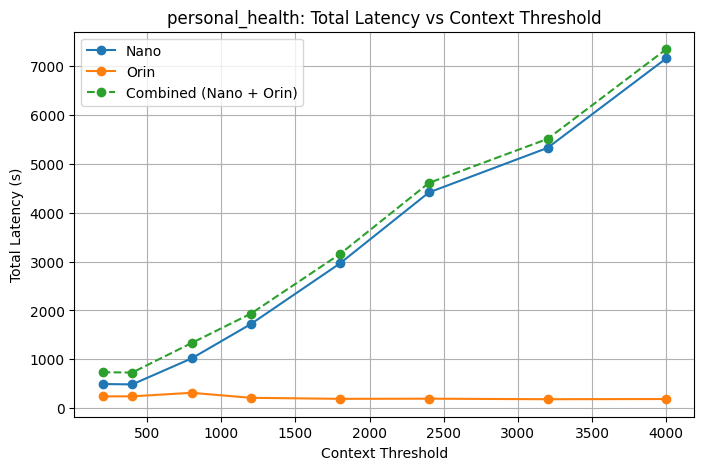

In [96]:
plot_total_latency(df_ph)

### Total Energy vs Context Threshold

In [97]:
def plot_total_energy(df):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, df["Nano Energy (J)"], label="Nano", marker='o')
    plt.plot(thresholds, df["Orin Energy (J)"], label="Orin", marker='o')

    total_energy = df["Nano Energy (J)"] + df["Orin Energy (J)"]
    plt.plot(df["Context Threshold"], total_energy, label="Combined (Nano + Orin)", marker='o', linestyle='--')

    plt.title(f"{query_set}: Total Energy Used vs Context Threshold")
    plt.xlabel("Context Threshold")
    plt.ylabel("Total Energy (J)")
    plt.legend()
    plt.grid(True)
    plt.show() 

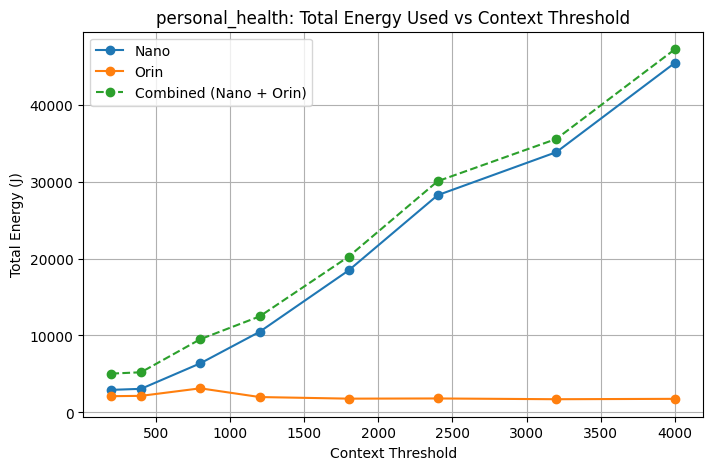

In [98]:
plot_total_energy(df_ph)

### Average Power vs Context Threshold

In [99]:
def plot_avg_power(df): 
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, df["Nano Avg Power (W)"], label="Nano", marker='o')
    plt.plot(thresholds, df["Orin Avg Power (W)"], label="Orin", marker='o')
    plt.title(f"{query_set}: Average Power vs Context Threshold")
    plt.xlabel("Context Threshold")
    plt.ylabel("Average Power (W)")
    plt.legend()
    plt.grid(True)
    plt.show()

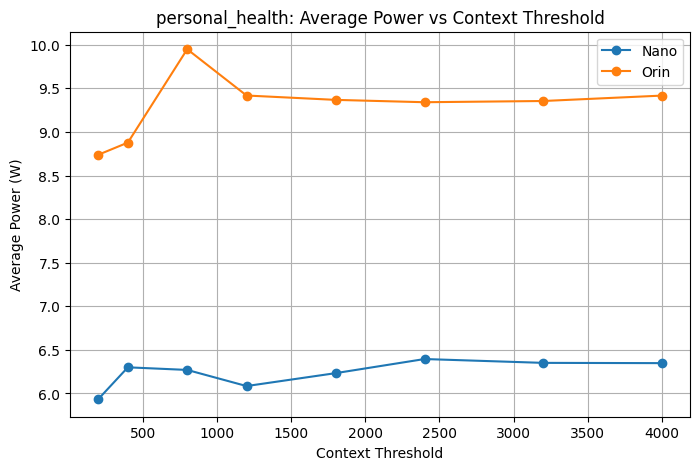

In [100]:
plot_avg_power(df_ph)

### Latency Per Token vs Context Threshold

In [101]:
def plot_latency_per_token(df):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, df["Nano Latency per Token (s/token)"], label="Nano", marker='o')
    plt.plot(thresholds, df["Orin Latency per Token (s/token)"], label="Orin", marker='o')
    plt.title(f"{query_set}: Latency per Token vs Context Threshold")
    plt.xlabel("Context Threshold")
    plt.ylabel("Latency per Token (s/token)")
    plt.legend()
    plt.grid(True)
    plt.show()

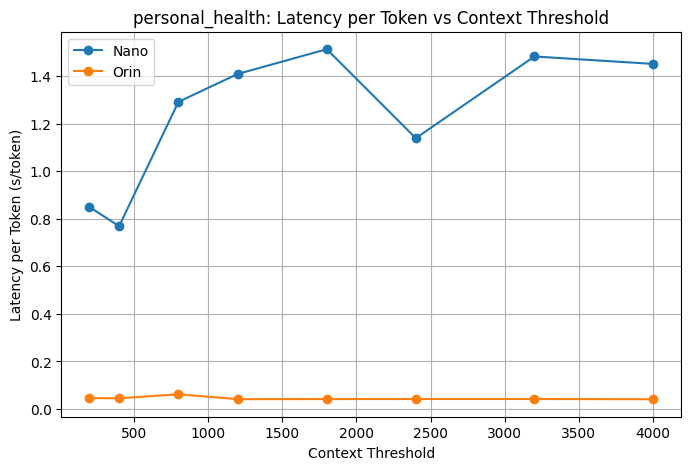

In [102]:
plot_latency_per_token(df_ph)

### Energy Per Token vs Context Thresholds

In [103]:
def plot_energy_per_token(df):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, df["Nano Energy per Token (J/token)"], label="Nano", marker='o')
    plt.plot(thresholds, df["Orin Energy per Token (J/token)"], label="Orin", marker='o')
    plt.title(f"{query_set}: Energy per Token vs Context Threshold")
    plt.xlabel("Context Threshold")
    plt.ylabel("Energy per Token (J/token)")
    plt.legend()
    plt.grid(True)
    plt.show() 

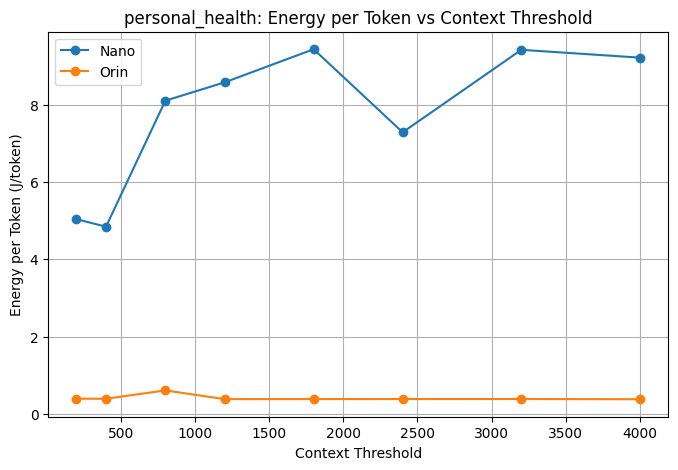

In [104]:
plot_energy_per_token(df_ph)